---
authors: Roel Smit
updated: December 3, 2025
---
# Meten bij constante druk
<!-- vervang bovenstaande titel -->

# Introductie

Volgens [de ideale gaswet](https://nl.wikipedia.org/wiki/Algemene_gaswet) wordt het volume $V$ van een (ideaal) gas gegeven door: 

$$
    V = n R T / P
$$

waarin 

- $n$ het aantal mol gas,
- $R$ de ideale gasconstante,
- $T$ de absolute temperatuur,
- $P$ de druk.

In dit practicum veranderen we de temperatuur en meten we de verandering van het volume van het gas. De proef is met name kwalitatief van aard en laat zien hoe lastig het is een extensieve grootheid als volume te meten.  

# Methode en materialen

## Ontwerp

Om het volume van een hoeveelheid gas bij constante druk te meten is niet zo eenvoudig. Je kunt het gas vrij eenvoudig in een ballon stoppen en dan schatten hoe de diameter van de ballon verandert als functie van de temperatuur, maar dat geeft een relatief grote fout (waarom?). We maken daarom gebruik van de wet van [Archimedes](https://nl.wikipedia.org/wiki/Wet_van_Archimedes). 

## Materialen

- eenvoudige feestballon
- bekerglas
- tweede bekerglas om mee bij te vullen
- thermometer
- verhittingsplaat
- deksel met vulcilinder met maatstrepen (met iets kleinere diameter dan interne diameter maatbeker)
- (per 5 groepjes) een $10 \mathrm{ml}$ maatcilinder

## Procedure

- Blaas de ballon op, maar niet verder dan $5 \mathrm{cm}$ in diameter. Deze moet makkelijk in de maatbeker passen. 
- Knoop de ballon goed dicht zodat er geen lucht kan ontsnappen. 
- Dompel de ballon onder in de maatbeker met water met behulp van het deksel.
- Pas het waterniveau aan zodat de meniscus (de bovenkant van het water) bij een van de onderste maatstrepen van de vulcilinder van het deksel zit. 
- Let op dat er luchtbellen kunnen plakken aan de ballon wat leidt tot een systematische fout. Verifieer dat je zo min mogelijk systematische fouten maakt en meet op welke maatstreep de meniscus zich bevindt.
- Verhoog stapsgewijst de temperatuur van het water (en dus de ballon). *Let op dat je de temperatuur maximaal een graad of 20 kan verhogen, want als je voorbij de vulcilinder komt met de meniscus, dan kan je de volumeverandering niet meer nauwkeurig bepalen.*
- Laat het geheel na elke temperatuurtoename een minuut 'rusten' om zo de tijd te geven om in thermisch evenwicht te komen.
- Meet na elke temperatuurtoename de temperatuur en de positie van de meniscus.

Het verschiloppervlak tussen de binnendiameter van de maatbeker en de buitendiameter van de vulcilinder is $10.0 \mathrm{cm}^{2}$. Je kunt die handmatig kalibreren met behulp van de kleine maatcilinder die in het lokaal aanwezig is. De maatstreepjes die op de vulcilinder zijn gekerfd zitten op een onderlinge afstand van $1.0 \mathrm{mm}$.

```{exercise} Analyseer de data
Plot de volumeverandering van de ballon als functie van de temperatuur. Zie je hier een lineair verband? Bepaal dan ook wat het startvolume van de ballon was door te extrapoleren naar een absolute temperatuur van $0 \mathrm{K}$.
```

Als je kritisch nadenkt over deze grafiek en de extrapolatie, dan kun je bezwaar maken tegen de precisie van deze proef. Het water in de maatbeker zet ook uit onder de verhoging van de temperatuur en geeft een systematische fout. Daar kun je een correctie voor uitvoeren. Voer die correctie uit als je nog genoeg tijd hebt:

```{exercise} Verbeterde meting
- Maak de maatbeker leeg en vul deze opnieuw met water tot een van de onderste maatstrepen van de vulcilinder (dus zonder ballon). 
- Verhit de maatbeker weer stapsgewijs en meet na elke stap de temperatuur en de hoogte van de meniscus.

Kun je nu met behulp van deze tweede meting een betere afschatting geven voor het startvolume van de ballon? 
```

# Resultaten

[   0.72591479 -214.32185833]


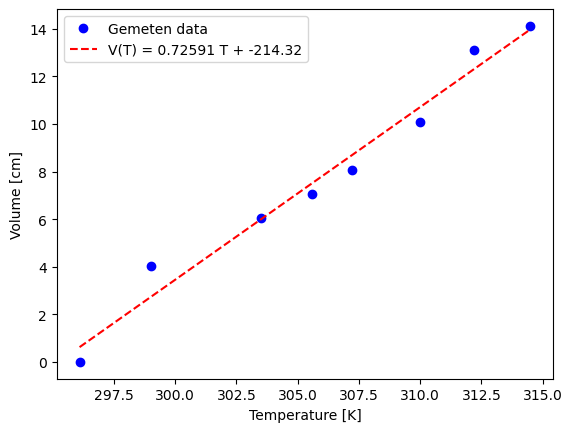

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metingen (ballon)
T_C = [23.2, 25.9, 30.6, 32.5, 34.3, 36.9, 39.3, 41.4]
h_cm = np.array([5, 9, 11, 12, 13, 15, 18, 19]) / 10  # mm -> cm

# Constantes
D_BEKER = 7.66 # cm
D_DEKSEL = 6.77 # cm
A_WATER = 1/4 * np.pi * (D_BEKER**2 - D_DEKSEL**2) #cm2


#Berekenen van V_cm3 en lineaire fit
V_cm3 = (np.asarray(h_cm) - h_cm[0]) * A_WATER
T_K = np.asarray(T_C) + 273
p_fit = np.polyfit(T_K, V_cm3, 1)
V_fit = np.poly1d(p_fit)
print(f"fit coef = {p_fit}")


# Plot
plt.plot(T_K, V_cm3, 'ob', label='Gemeten data')
plt.plot(T_K, V_fit(T_K), '--r', label=f'V(T) = {p_fit[0]:.5f} T + {p_fit[1]:.2f}')
plt.xlabel('Temperature [K]')
plt.ylabel('Volume [cm^3]')
plt.legend()
plt.show()


[  0.26325621 -78.41551168]


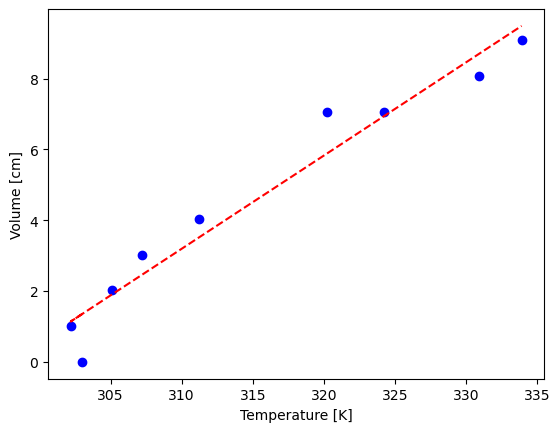

De volume van de ballon bedraagt: 137.0624325 cm3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metingen (zonder ballon)
T_C0 = [30.1, 29.1, 32.2, 34.1, 38.3, 47.1, 51.3, 57.8, 61.0] # °C
h_cm0 = np.array([4, 5, 6, 7, 8, 11, 11, 12, 13]) / 10  # mm -> cm

# Constantes
D_BEKER = 7.66 # cm
D_DEKSEL = 6.77 # cm
A_WATER = 1/4 * np.pi * (D_BEKER**2 - D_DEKSEL**2) #cm2

# Fit / berekeningen
V_cm3_0 = (np.asarray(h_cm0) - h_cm0[0]) * A_WATER
T_K0 = np.asarray(T_C0) + 273
p_fit0 = np.polyfit(T_K0, V_cm3_0, 1)
V_fit0 = np.poly1d(p_fit0)
print(f"fit coef = {p_fit0}")

# Plot
plt.plot(T_K0, V_cm3_0, 'ob')
plt.plot(T_K0, V_fit0(T_K0), '--r')
plt.xlabel('Temperature [K]')
plt.ylabel('Volume [cm^3]')
plt.show()

# Afleiding V_ballon
A_BALLON = 0.725914 #cm3/K
A_ZONDER = 0.263256 #cm3/K
A_VOL = A_BALLON - A_ZONDER

# Startpunt T (ballon)
V_ballon = A_VOL * (273.15+23.1)
print(f"V_ballon ≈ {V_ballon:.1f} cm3")


# Discussie en conclusie


Uit de proef is gebleken dat het volume van de ballon ongeveer 137 kubieke centimeter bestaat. Als we de ballon beschouwen als een perfecte bol met een diameter van 5 cm, dan zou het maximale volume ongeveer 65 kubieke centimeter moeten zijn. In deze proef zitten dus overduidelijk grote systematische fouten. Hoogstwaarschijnlijk was de ballon geen perfecte bol, maar eerder ellipsoide. Dit zorgt voor groot verschil in volume. Bij een vervolgproef kan de volume van de ballon worden gemeten in plaats van het benaderen tot een perfecte bol. Ook zet de maatbeker zelf uit door de hitte; hierdoor wordt de proef ook verstoord